In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [45]:
df = pd.read_csv("ai4i2020.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [47]:
df.duplicated().sum()

0

In [48]:
num = list(df.columns[3:8])
cat = [df.columns[2]]
label_binary = [df.columns[8]]
label_multi = list(df.columns[9:])

In [49]:
df_failures = df.loc[df[label_binary[0]] == 1]
df_failures[(df_failures[label_multi] == 0).all(axis=1)][label_binary + label_multi]

,Machine failure,TWF,HDF,PWF,OSF,RNF
1437,1,0,0,0,0,0
2749,1,0,0,0,0,0
4044,1,0,0,0,0,0
4684,1,0,0,0,0,0
5536,1,0,0,0,0,0
5941,1,0,0,0,0,0
6478,1,0,0,0,0,0
8506,1,0,0,0,0,0
9015,1,0,0,0,0,0


In [50]:
df.drop(df_failures[(df_failures[label_multi] == 0).all(axis=1)][label_binary + label_multi].index, inplace = True)
df.reset_index(drop = True, inplace = True)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9987,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9988,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9989,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


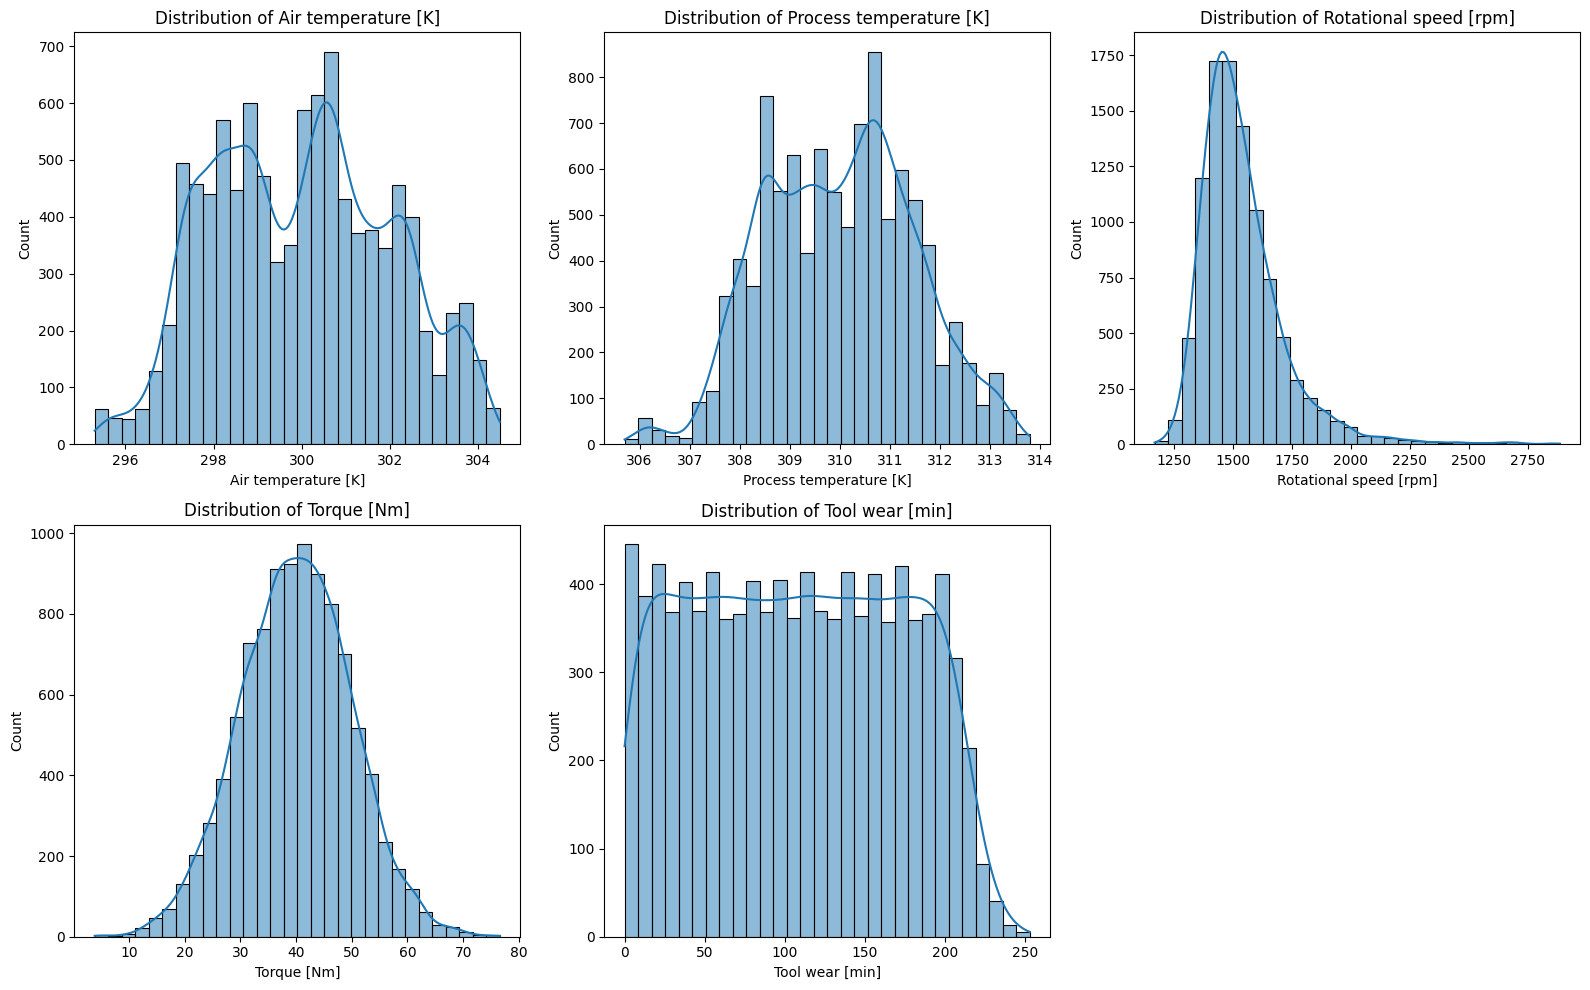

In [51]:
plt.figure(figsize=(16, 10))

num_cols = ['Air temperature [K]', 'Process temperature [K]', 
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

In [52]:
df[df['Machine failure']==1][label_multi].value_counts()

TWF  HDF  PWF  OSF  RNF
0    1    0    0    0      106
     0    1    0    0       80
          0    1    0       78
1    0    0    0    0       42
0    0    1    1    0       11
     1    0    1    0        6
          1    0    0        3
1    0    0    1    0        2
               0    1        1
          1    1    0        1
Name: count, dtype: int64

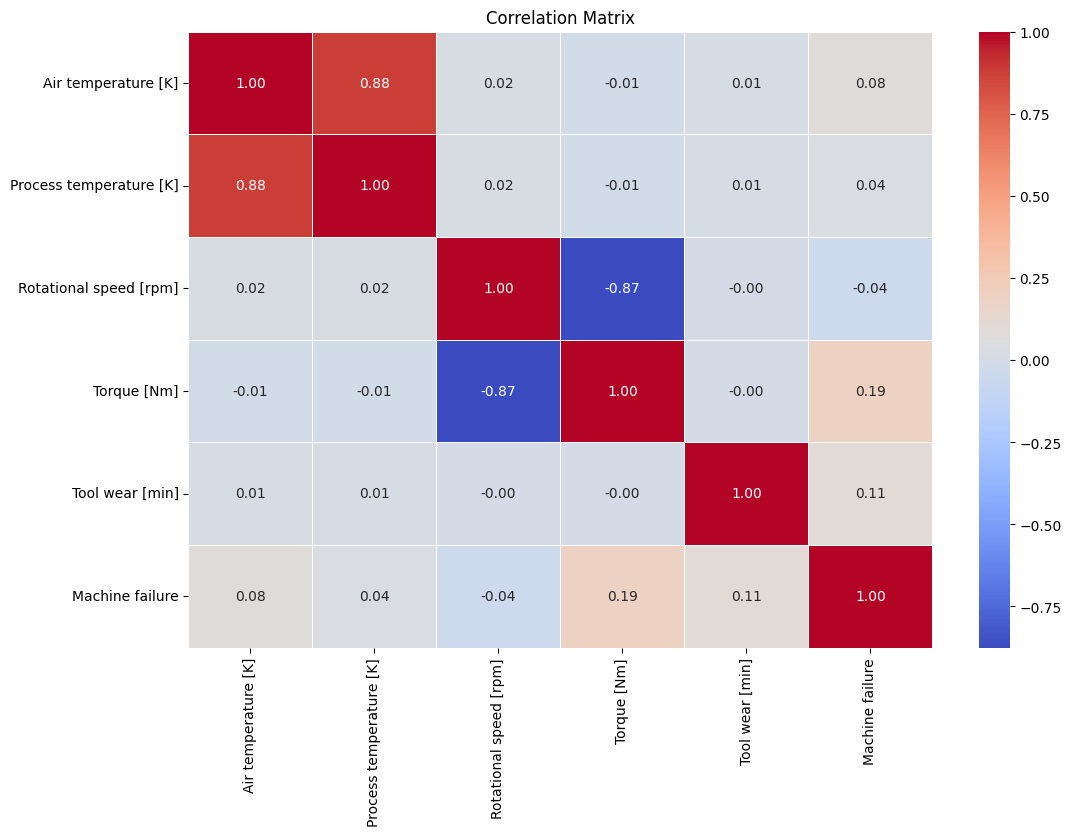

In [53]:
plt.figure(figsize=(12, 8))
corr_matrix = df[num_cols + ['Machine failure']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [54]:
X = df.drop(['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure'], axis=1)
y = df['Machine failure']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

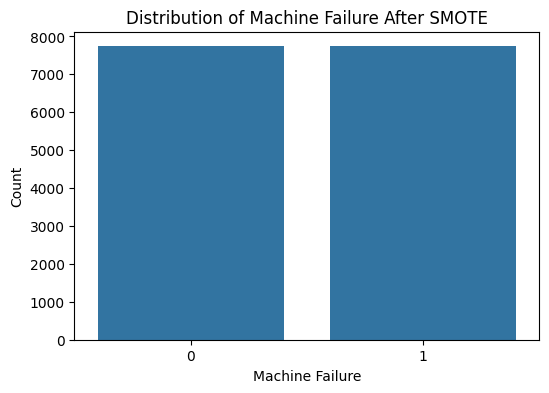

In [56]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_sm)
plt.title('Distribution of Machine Failure After SMOTE')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()

In [57]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [58]:
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_sm, y_train_sm)

best_rf = grid_search.best_estimator_
best_rf.fit(X_train_sm, y_train_sm)

prediction = best_rf.predict(X_test)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [59]:
cm = confusion_matrix(y_test, prediction)
cr = classification_report(y_test, prediction)
acc = accuracy_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)

print(f"Confusion Matrix:\n{cm}\n")
print(f"Classification Report:\n{cr}\n")
print(f"Accuracy Score: {acc}\n")
print(f"ROC AUC Score: {roc_auc}\n")


Confusion Matrix:
[[1863   61]
 [  14   61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1924
           1       0.50      0.81      0.62        75

    accuracy                           0.96      1999
   macro avg       0.75      0.89      0.80      1999
weighted avg       0.97      0.96      0.97      1999


Accuracy Score: 0.9624812406203102

ROC AUC Score: 0.8908142758142759



Confusion Matrix:


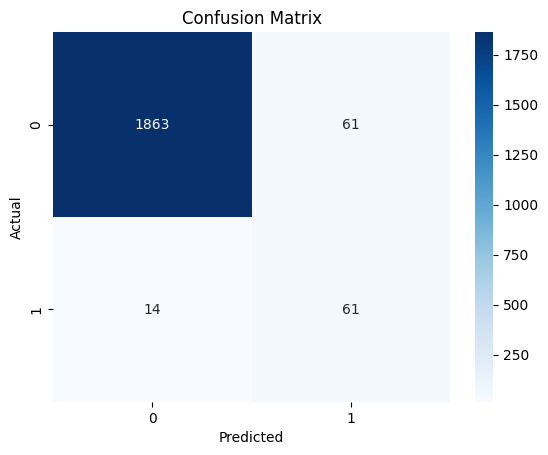

In [60]:
print('Confusion Matrix:')
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues')
plt.ylabel('Actual',fontsize=10)
plt.xlabel('Predicted',fontsize=10)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

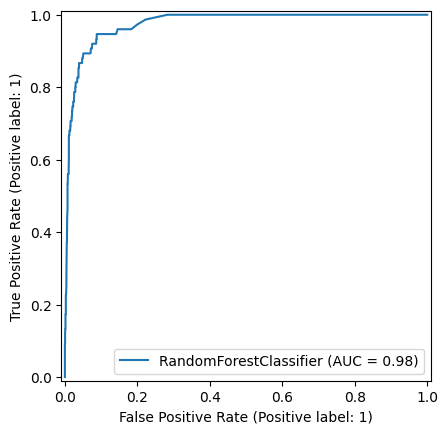

In [64]:
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.show()